### Importing Libraries and Reading dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling as pp
import altair as alt
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
%matplotlib inline

In [3]:
# reading dataset
production = pd.read_csv(r"https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Production%20(2004%20-%202013).csv")

In [4]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [5]:
production.describe()

Year         Value
count  23110.000000  23110.000000
mean    2008.498269    327.785201
std        2.871740   1607.940343
min     2004.000000      0.000000
25%     2006.000000      3.000000
50%     2008.000000     18.000000
75%     2011.000000    108.000000
max     2013.000000  54000.000000

In [6]:
# adding the unit in metric kilotons to the value column
production = production.rename(columns={'Value': 'Value(kt)'})

In [7]:
# convert year to DateObject
production['Year'] = pd.to_datetime(production['Year'], format = '%Y')

In [8]:
production['Year'] = production['Year'].dt.year

In [9]:
# grouping data
grouped_data = production.groupby(['Country', 'Year', 'Item'])['Value(kt)'].sum()
grouped_data = grouped_data.to_frame().reset_index()

In [10]:
# total production
production_total = production.groupby(['Country', 'Year'])['Value(kt)'].sum()
production_total = production_total.to_frame().reset_index()

### Solution to Quiz

In [12]:
supply = pd.read_csv(r"https://www.wolframcloud.com/obj/mar/Hamoye/Session%202/Data/Africa%20Food%20Supply%20(2004%20-%202013).csv")

In [13]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [14]:
# rename value column by adding the unit in metric kilotons
supply = supply.rename(columns={'Value': 'Value(kcal)'})

In [15]:
# group data
supply_grouped = supply.groupby(['Country', 'Year'])['Value(kcal)'].sum()
supply_grouped = supply_grouped.to_frame().reset_index()

3. Lowest food supply between 2004 to 2006

In [16]:
supply_2004 = supply[(supply["Year"] == 2004)]
supply_2004_sort = supply_2004.sort_values(['Value(kcal)'], ascending=[True])
supply_2004_sort.head()

Country  Year  Value(kcal)
430                    Zambia  2004         1866
130                  Ethiopia  2004         1882
320                    Rwanda  2004         1969
220                Madagascar  2004         1980
70   Central African Republic  2004         1989

In [17]:
supply_2005 = supply[(supply["Year"] == 2005)]
supply_2005_sort = supply_2005.sort_values(['Value(kcal)'], ascending=[True])
supply_2005_sort.head()

Country  Year  Value(kcal)
431                    Zambia  2005         1873
131                  Ethiopia  2005         1978
441                  Zimbabwe  2005         2025
71   Central African Republic  2005         2026
81                       Chad  2005         2034

In [18]:
supply_2006 = supply[(supply["Year"] == 2006)]
supply_2006_sort = supply_2006.sort_values(['Value(kcal)'], ascending=[True])
supply_2006_sort.head()

Country  Year  Value(kcal)
432                    Zambia  2006         1838
132                  Ethiopia  2006         1967
82                       Chad  2006         2022
72   Central African Republic  2006         2029
322                    Rwanda  2006         2044

4. Country with highest oat production

In [19]:
oats = production[(production["Item"] == "Oats")]
oats_2010 = oats[(oats["Year"] == 2010)]
oats_2010

Country  Item  Year  Value(kt)
46          Algeria  Oats  2010         88
6406       Ethiopia  Oats  2010         48
7746          Ghana  Oats  2010          0
9286          Kenya  Oats  2010          3
10026       Lesotho  Oats  2010          0
13186       Morocco  Oats  2010         37
17816  South Africa  Oats  2010         34
20056       Tunisia  Oats  2010          2
22516      Zimbabwe  Oats  2010          1

## General Mean Production and Supply

In [20]:
production_data = production['Country'].value_counts().sort_index().index

In [21]:
production_data1 = production.groupby('Country')['Value(kt)'].agg('mean')

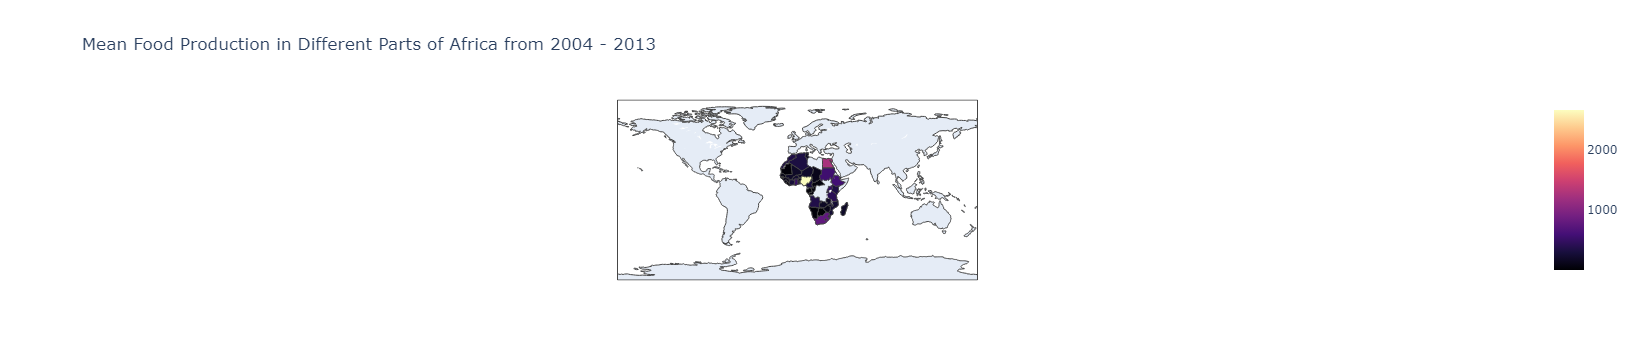

In [22]:
# drawing the map
import folium
trace = go.Choropleth(
    locationmode = 'country names',
    locations = production_data,
    text = production_data,
    colorscale = 'magma',
    z = production_data1.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Food Production in Different Parts of Africa from 2004 - 2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

In [23]:
supply_data = supply['Country'].value_counts().sort_index().index

In [24]:
supply_data1 = supply.groupby('Country')['Value(kcal)'].agg('mean')

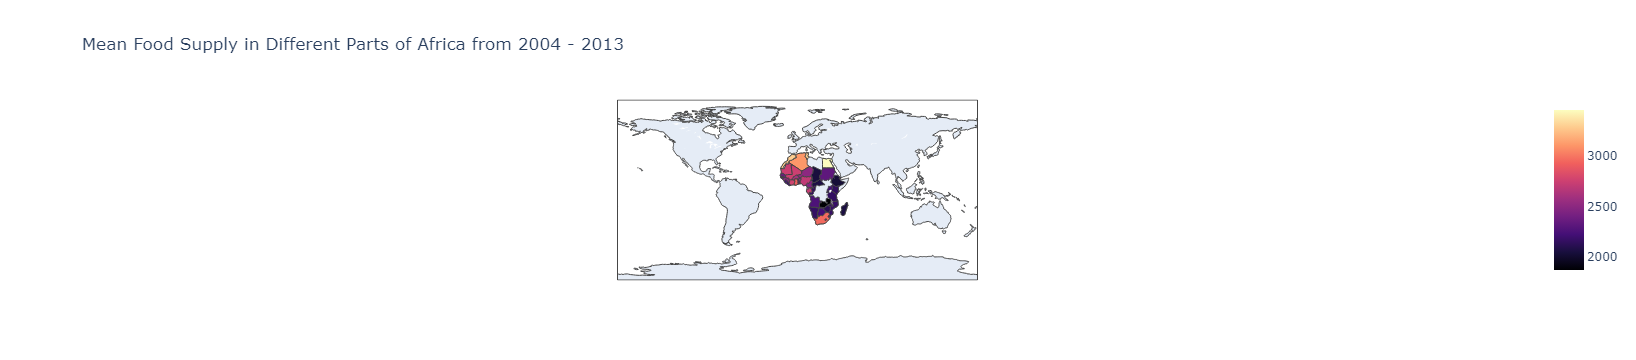

In [25]:
# drawing the map
import folium
trace = go.Choropleth(
    locationmode = 'country names',
    locations = supply_data,
    text = supply_data,
    colorscale = 'magma',
    z = supply_data1.values
)
df3 = [trace]
layout = go.Layout(
    title = 'Mean Food Supply in Different Parts of Africa from 2004 - 2013')

fig = go.Figure(data = df3, layout = layout)
iplot(fig)

## Food Production and Supply over the period

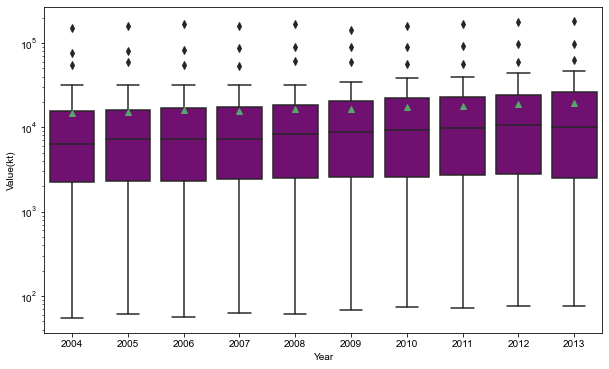

In [26]:
bar,ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Year", y="Value(kt)", data=production_total, color='purple', showmeans=True)
ax.set_yscale('log')

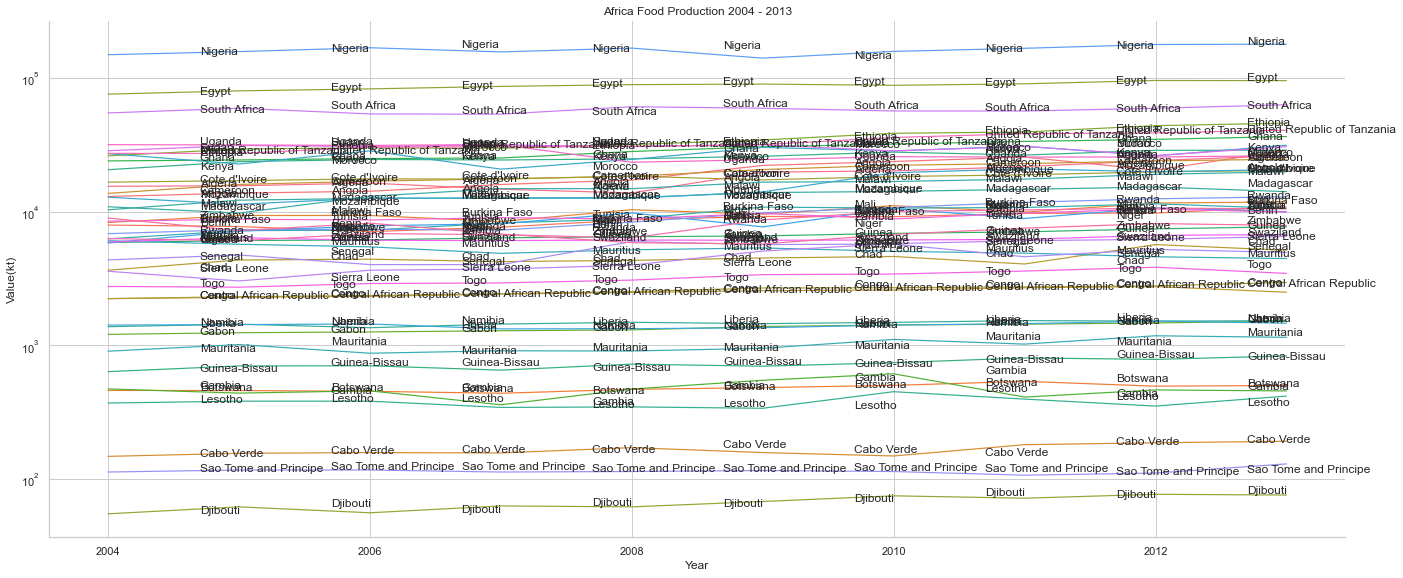

In [27]:
# plot data
Country = production_total['Country']
Year = production_total['Year']
Value = production_total['Value(kt)']

# keyword arguments for styling the plot
kwargs = dict (linestyle='-', hue='Country', linewidth=1.2, markersize=13)
ax = sns.relplot(
    data=production_total, 
    x="Year", y="Value(kt)",
    height=8, aspect=2.4, 
    kind="line", legend=False,
**kwargs).set(title="Africa Food Production 2004 - 2013")
ax.fig.get_axes()[0].set_yscale('log')

# annotating label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Year[i]+0.7, Value[i]+0.5) )

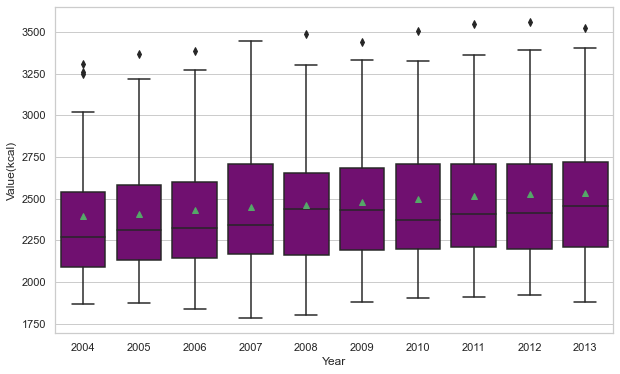

In [28]:
bar,ax = plt.subplots(figsize=(10,6))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="Year", y="Value(kcal)", data=supply_grouped, color = 'purple', showmeans=True)
plt.savefig("supplyboxplot.svg")

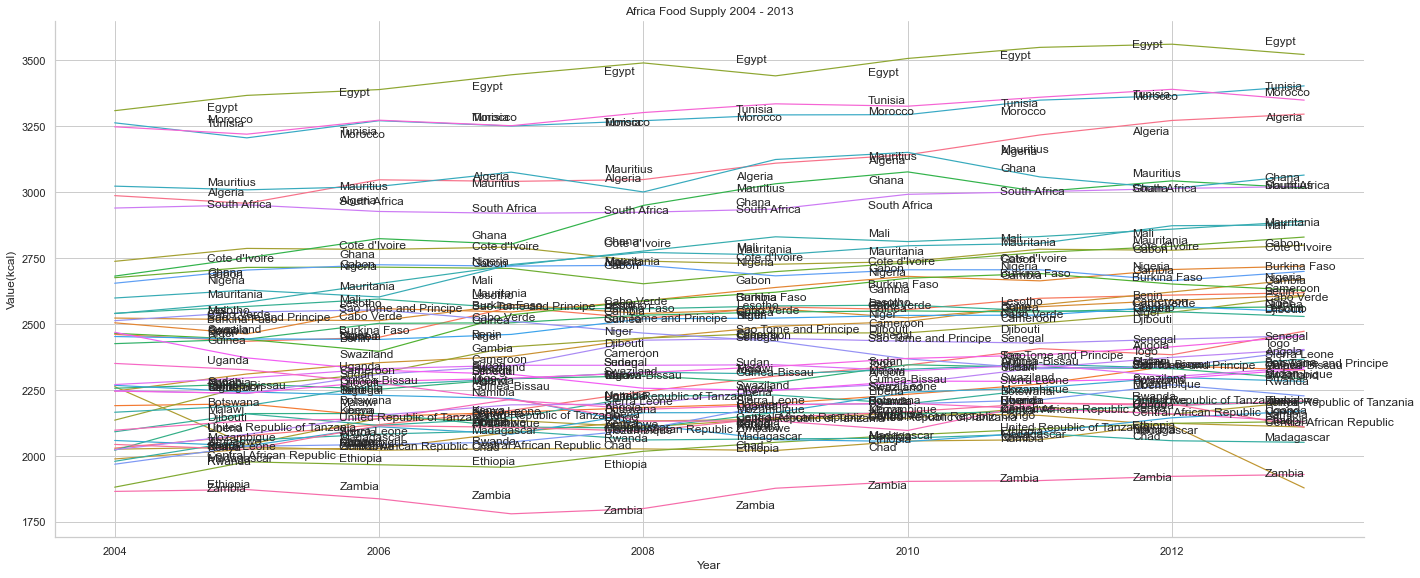

In [29]:
# plot data
Country = supply_grouped['Country']
Year = supply_grouped['Year']
Value = supply_grouped['Value(kcal)']

# keyword arguments for styling the plot
kwargs = dict (linestyle='-', hue='Country', linewidth=1.2, markersize=13)
ax = sns.relplot(
    data=supply_grouped, 
    x="Year", y="Value(kcal)",
    height=8, aspect=2.4, 
    kind="line", legend=False,
**kwargs).set(title="Africa Food Supply 2004 - 2013")

# annotating label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Year[i]+0.7, Value[i]+0.5) )

## Identifying Trends in Production and Supply

In [30]:
production_trend = pd.merge(production_total, supply_grouped, how='inner')

## Trends for Year


In [31]:
year_trend = production_trend.groupby(['Year']).median()

In [32]:
year_trend.to_csv('year_trend.csv', index=True)

In [33]:
df_year = pd.read_csv('year_trend.csv')

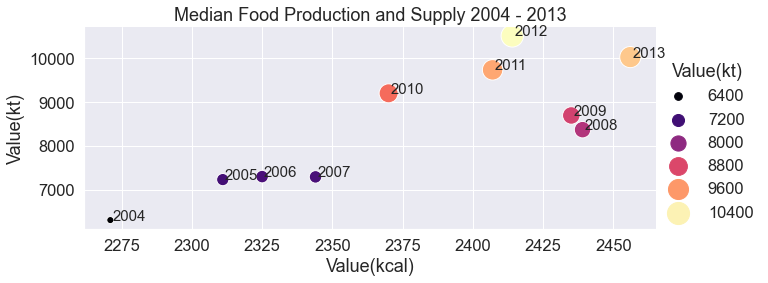

In [34]:
#plot data
Year = df_year['Year']
Value1 = df_year['Value(kt)']
Value2 = df_year['Value(kcal)']

# keyword arguments for styling the plot
sns.set(font_scale = 1.5)
ax = sns.relplot(
    data=df_year, 
    x="Value(kcal)", y="Value(kt)",size=('Value(kt)'),sizes=(50,500),
    height=4, aspect=2.4, 
    legend=True,hue='Value(kt)', palette=('magma')).set(title="Median Food Production and Supply 2004 - 2013")

# annotate label points 
for i, Year in enumerate (Year):
    plt.annotate(Year, (Value2[i]+0.7, Value1[i]+0.5), size=15)

## Trends for Country

In [35]:
country_trend = production_trend.groupby(['Country']).median()

In [36]:
country_trend.to_csv('country_trend.csv', index=True)

In [37]:
df_country = pd.read_csv('country_trend.csv')

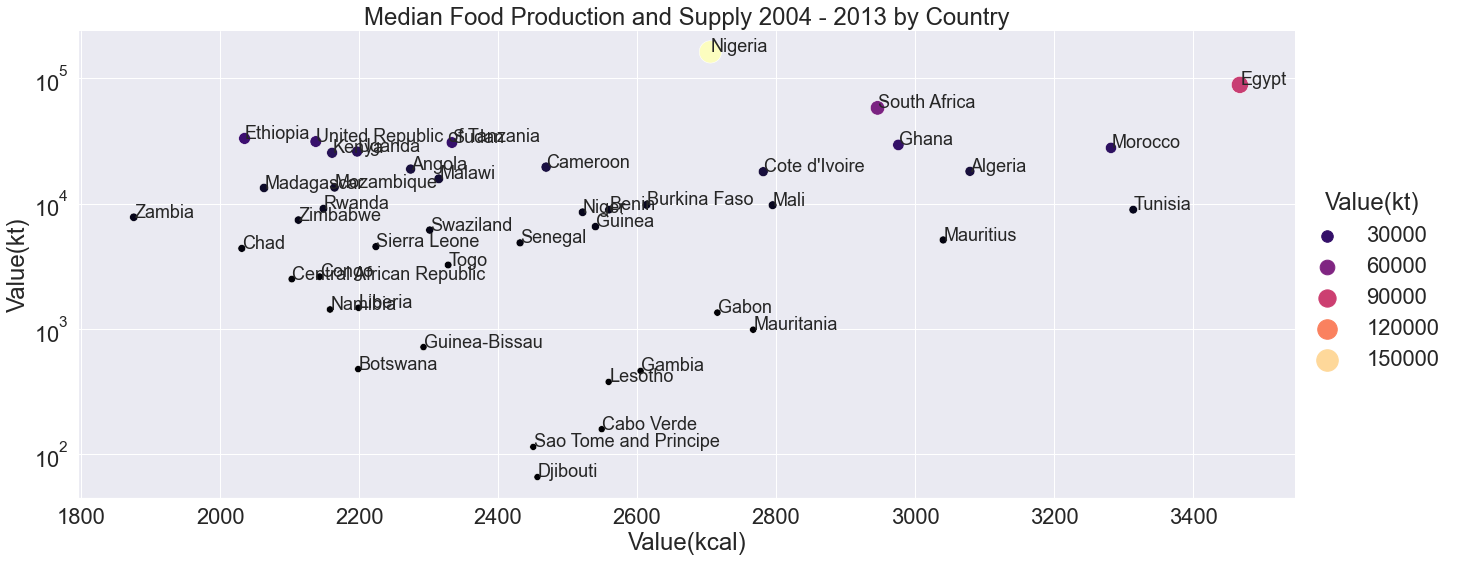

In [38]:
#plot data
Country = df_country['Country']
Value1 = df_country['Value(kt)']
Value2 = df_country['Value(kcal)']

# keyword arguments for styling the plot
sns.set(font_scale = 2)
ax = sns.relplot(
    data=df_country, 
    x="Value(kcal)", y="Value(kt)", size=('Value(kt)'),sizes=(50,500),
    height=8, aspect=2.4, 
    legend=True, hue='Value(kt)', palette=('magma')).set(title="Median Food Production and Supply 2004 - 2013 by Country")
ax.fig.get_axes()[0].set_yscale('log')

# annotate label points 
for i, Country in enumerate (Country):
    plt.annotate(Country, (Value2[i]+0.7, Value1[i]+0.5), size=18)

## Highest producers of staple foods


### Cassava

In [39]:
# top 10 countries
production_cassava = production[(production["Item"] == "Cassava and products")]
production_cassava = production_cassava.groupby('Country')['Value(kt)'].mean()
production_cassava = production_cassava.to_frame(name='value').reset_index()
production_cassava_sort = production_cassava.sort_values(['value'], ascending=[False])
production_cassava_sort = production_cassava_sort.head(10)

C:\Users\agyei\AppData\Local\Temp\ipykernel_13784\1089836831.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




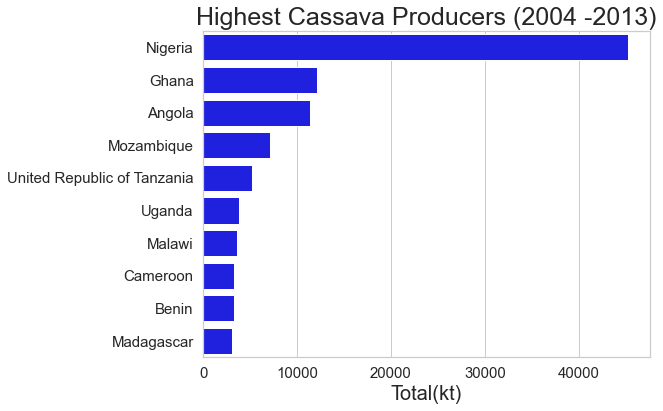

In [40]:
# create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='value', y='Country', data=production_cassava_sort, ci=None, color='blue',orient='h')
ax.set_title('Highest Cassava Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Rice

In [41]:
# top 10 countries
production_rice = production[(production["Item"] == "Rice (Milled Equivalent)")]
production_rice = production_rice.groupby('Country')['Value(kt)'].mean()
production_rice = production_rice.to_frame(name='value').reset_index()
production_rice_sort = production_rice.sort_values(['value'], ascending=[False])
production_rice_sort = production_rice_sort.head(10)

C:\Users\agyei\AppData\Local\Temp\ipykernel_13784\299401265.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




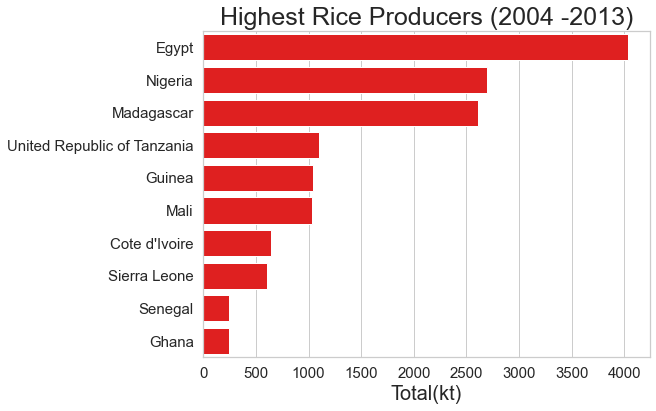

In [42]:
# create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='value', y='Country', data=production_rice_sort, ci=None, color='red',orient='h')
ax.set_title('Highest Rice Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Maize

In [43]:
production_maize = production[(production["Item"] == "Maize and products")]

In [44]:
# top 10 countries
production_maize = production_maize.groupby('Country')['Value(kt)'].mean()
production_maize = production_maize.to_frame(name='value').reset_index()
production_maize_sort = production_maize.sort_values(['value'], ascending=[False])
production_maize_sort = production_maize_sort.head(10)

C:\Users\agyei\AppData\Local\Temp\ipykernel_13784\1721079609.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




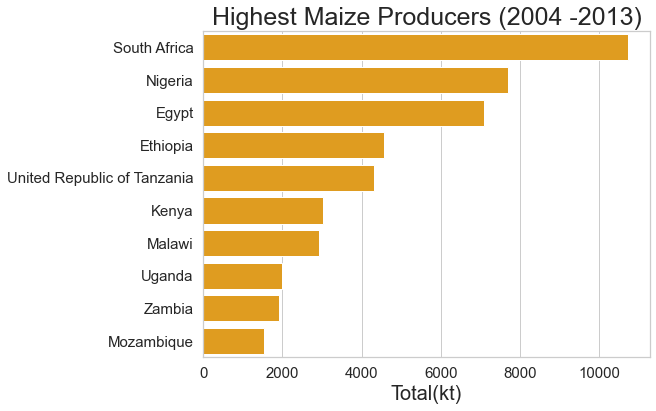

In [45]:
# create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='value', y='Country', data=production_maize_sort, ci=None, color='orange',orient='h')
ax.set_title('Highest Maize Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Potatoes

In [46]:
# top 10 countries
production_potato = production[(production["Item"] == "Potatoes and products")]
production_potato = production_potato.groupby('Country')['Value(kt)'].mean()
production_potato = production_potato.to_frame(name='value').reset_index()
production_potato_sort = production_potato.sort_values(['value'], ascending=[False])
production_potato_sort = production_potato_sort.head(10)

C:\Users\agyei\AppData\Local\Temp\ipykernel_13784\673948348.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




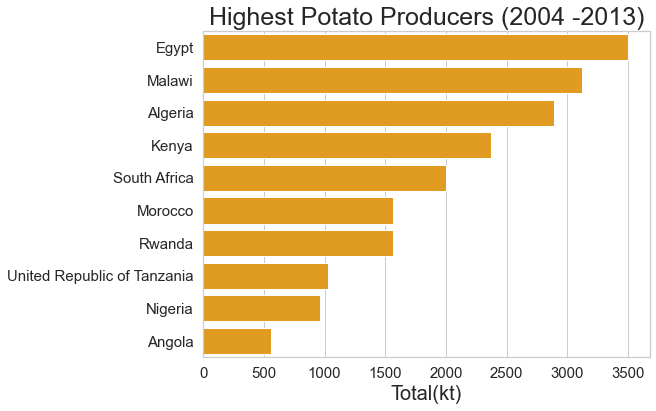

In [47]:
# create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='value', y='Country', data=production_potato_sort, ci=None, color='orange',orient='h')
ax.set_title('Highest Potato Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Wheat

In [48]:
# top 10 countries
production_wheat = production[(production["Item"] == "Wheat and products")]
production_wheat = production_wheat.groupby('Country')['Value(kt)'].mean()
production_wheat = production_wheat.to_frame(name='value').reset_index()
production_wheat_sort = production_wheat.sort_values(['value'], ascending=[False])
production_wheat_sort = production_wheat_sort.head(10)

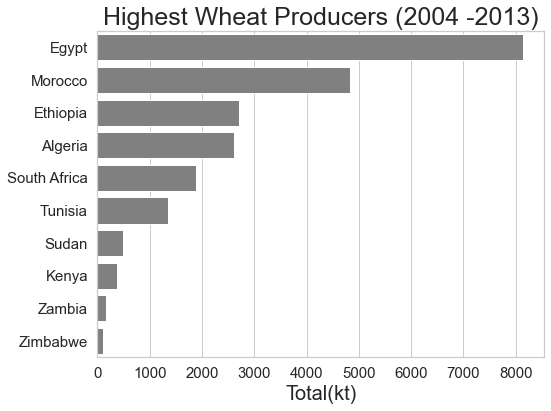

In [49]:
# create a bar chart using Seaborn
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x='value', y='Country', data=production_wheat_sort, errorbar=None, color='grey',orient='h')
ax.set_title('Highest Wheat Producers (2004 -2013)', fontsize=25)
ax.set_xlabel ("Total(kt)", fontsize=20)
ax.set_ylabel (None, fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)